<div id="top">
    <h1>SAE Classement ParcourSup Département Informatique</h1>
<div/>

<div id="données" ><h1>Données</h1>
<p> Dans un premier temps, on importe, tous les modules nécessaires à ce projet. </p>
    </div>

In [12]:
import pandas as pd
from math import isnan
import time 
import numpy as np
import matplotlib.pyplot as plt

<p> On récupères la DataFrame de l'Excel </p>

In [13]:
df = pd.read_excel("PS_INFO.xlsx",engine='openpyxl')

<div id="Nombre_Candidatures" style="font-size: 1.2em; font-weight: bold; margin-top: 20px;"></div>
<h3 style="font-size: 1.5em; margin-top: 30px;">Nombre de candidatures</h3>
<p">
  <details open style="margin-top: 20px;">
    <summary style="font-size: 1.1em; font-weight: bold;color:green">Menu ICI</summary>
    <ul style="margin-top: 10px; margin-left: 20px;">
      <li>
        <a href="#données" style="font-weight: bold;">Données</a>
        <ul style="margin-left: 20px;">
          <li><a href="#Nombre_Candidatures">Nombre de candidatures</a></li>
          <li><a href="#matrice">Matrice de traitement</a></li>
          <li><a href="#Recup">Récupération des données</a></li>
          <li><a href="#FichierClassement">Création d'un fichier de traitement manuel</a></li>
          <li><a href="#injection">Injection du travail manuel</a></li>
        </ul>
      </li>
      <li>
        <a href="#StatTOUT" style="font-weight: bold;">Statistiques sur tous les candidats</a>
        <ul style="margin-left: 20px;">
          <li><a href="#GeneralTOUT">Générales</a></li>
          <li><a href="#NotesTOUT">Notes</a></li>
          <li><a href="#BoursiersTOUT">Boursiers</a></li>
          <li><a href="#GenreTOUT">Genre</a></li>
          <li><a href="#LocTOUT">Géographie</a></li>
        </ul>
      </li>
      <li>
        <a href="StatCLASSE" style="font-weight: bold;">Statistiques sur les candidats classés</a>
        <ul style="margin-left: 20px;">
          <li><a href="#GeneralCLASSE">Générales</a></li>
          <li><a href="#NotesCLASSE">Notes</a></li>
          <li><a href="#BoursiersCLASSE">Boursiers</a></li>
          <li><a href="#GenreCLASSE">Genre</a></li>
          <li><a href="#LocCLASSE">Géographie</a></li>
        </ul>
      </li>
    </ul>
  </details>    
</p>


In [30]:
Taille = len(df)
Voeux_NonConf=0
Gen=0
Techno=0
for i in range(Taille) :
    groupe = df['Groupe'][i]
    if(df['Candidature validée (O/N)'][i]=='Non') : Voeux_NonConf+=1 
    else : 
        if(groupe==7415) : 
            Gen+=1
        else : Techno+=1
print("Nombre de vœux  total :", Taille)
print("Nombre de vœux non confirmés :", Voeux_NonConf)
print("Nombre de vœux confirmés :", Taille-Voeux_NonConf)
print('Dont', Gen, "bacs généraux et", Techno, "bacs technologique")



Nombre de vœux  total : 4605
Nombre de vœux non confirmés : 243
Nombre de vœux confirmés : 4362
Dont 2972 bacs généraux et 1390 bacs technologique


<div id="matrice" style="font-size: 1.2em; font-weight: bold; margin-top: 20px;"></div>
<h3 style="font-size: 1.5em; margin-top: 30px;">Matrice de traitement</h3>
<p">
  <details open style="margin-top: 20px;">
    <summary style="font-size: 1.1em; font-weight: bold;color:green">Menu ICI</summary>
    <ul style="margin-top: 10px; margin-left: 20px;">
      <li>
        <a href="#données" style="font-weight: bold;">Données</a>
        <ul style="margin-left: 20px;">
          <li><a href="#Nombre_Candidatures">Nombre de candidatures</a></li>
          <li><a href="#matrice">Matrice de traitement</a></li>
          <li><a href="#Recup">Récupération des données</a></li>
          <li><a href="#FichierClassement">Création d'un fichier de traitement manuel</a></li>
          <li><a href="#injection">Injection du travail manuel</a></li>
        </ul>
      </li>
      <li>
        <a href="#StatTOUT" style="font-weight: bold;">Statistiques sur tous les candidats</a>
        <ul style="margin-left: 20px;">
          <li><a href="#GeneralTOUT">Générales</a></li>
          <li><a href="#NotesTOUT">Notes</a></li>
          <li><a href="#BoursiersTOUT">Boursiers</a></li>
          <li><a href="#GenreTOUT">Genre</a></li>
          <li><a href="#LocTOUT">Géographie</a></li>
        </ul>
      </li>
      <li>
        <a href="StatCLASSE" style="font-weight: bold;">Statistiques sur les candidats classés</a>
        <ul style="margin-left: 20px;">
          <li><a href="#GeneralCLASSE">Générales</a></li>
          <li><a href="#NotesCLASSE">Notes</a></li>
          <li><a href="#BoursiersCLASSE">Boursiers</a></li>
          <li><a href="#GenreCLASSE">Genre</a></li>
          <li><a href="#LocCLASSE">Géographie</a></li>
        </ul>
      </li>
    </ul>
  </details>    
</p>


In [15]:
ENS_GEN=['MATH', 'MATH_EXP', 'MATH_COMP', 'SCIENCES', 'NSI', 'SES', 'FRANCAIS', 'ANGLAIS']
ENS_TECHNO=['MATH', 'SCIENCES', 'NSI', 'FRANCAIS', 'ANGLAIS']

MATRICE_G = pd.DataFrame(
    {
        'MATH': [1,2,3,2,3,4,13,8], 
        'MATH_EXP': [1,2,3,2,3,4,6,6], 
        'MATH_COMP': [0,0,0,1,2,3,9,7], 
        'SCIENCES': [1,2,3,2,3,4,4,8], 
        'NSI': [1,1,1,2,2,2,6,8],  
        'SES': [1,1,1,2,2,2,5,7], 
        'ANGLAIS': [1,1,1,1,1,1,4,8], 
        'FRANCAIS': [1,1,1,1,1,1,9,8]
    },
    index = ['P1', 'P2', 'P3', 'T1', 'T2', 'T3', 'COEF', 'PLANCHE']
)

MATRICE_T = pd.DataFrame(
    {
        'MATH': [1,2,3,2,3,4,13,10], 
        'SCIENCES': [1,2,3,2,3,4,4,8], 
        'NSI': [1,1,1,2,2,2,6,9],  
        'ANGLAIS': [1,1,1,1,1,1,4,8], 
        'FRANCAIS': [1,1,1,1,1,1,9,8]
    },
    index = ['P1', 'P2', 'P3', 'T1', 'T2', 'T3', 'COEF', 'PLANCHE']
)

print("Matrice pour les bac généraux :")
print(MATRICE_G)

print("\n\nMatrice pour les bac techno :")
print(MATRICE_T)

Matrice pour les bac généraux :
         MATH  MATH_EXP  MATH_COMP  SCIENCES  NSI  SES  ANGLAIS  FRANCAIS
P1          1         1          0         1    1    1        1         1
P2          2         2          0         2    1    1        1         1
P3          3         3          0         3    1    1        1         1
T1          2         2          1         2    2    2        1         1
T2          3         3          2         3    2    2        1         1
T3          4         4          3         4    2    2        1         1
COEF       13         6          9         4    6    5        4         9
PLANCHE     8         6          7         8    8    7        8         8


Matrice pour les bac techno :
         MATH  SCIENCES  NSI  ANGLAIS  FRANCAIS
P1          1         1    1        1         1
P2          2         2    1        1         1
P3          3         3    1        1         1
T1          2         2    2        1         1
T2          3         3    2  

<div id="Recup" style="font-size: 1.2em; font-weight: bold; margin-top: 20px;"></div>
<h3 style="font-size: 1.5em; margin-top: 30px;">Récupération des données</h3>
<p">
  <details open style="margin-top: 20px;">
    <summary style="font-size: 1.1em; font-weight: bold;color:green">Menu ICI</summary>
    <ul style="margin-top: 10px; margin-left: 20px;">
      <li>
        <a href="#données" style="font-weight: bold;">Données</a>
        <ul style="margin-left: 20px;">
          <li><a href="#Nombre_Candidatures">Nombre de candidatures</a></li>
          <li><a href="#matrice">Matrice de traitement</a></li>
          <li><a href="#Recup">Récupération des données</a></li>
          <li><a href="#FichierClassement">Création d'un fichier de traitement manuel</a></li>
          <li><a href="#injection">Injection du travail manuel</a></li>
        </ul>
      </li>
      <li>
        <a href="#StatTOUT" style="font-weight: bold;">Statistiques sur tous les candidats</a>
        <ul style="margin-left: 20px;">
          <li><a href="#GeneralTOUT">Générales</a></li>
          <li><a href="#NotesTOUT">Notes</a></li>
          <li><a href="#BoursiersTOUT">Boursiers</a></li>
          <li><a href="#GenreTOUT">Genre</a></li>
          <li><a href="#LocTOUT">Géographie</a></li>
        </ul>
      </li>
      <li>
        <a href="StatCLASSE" style="font-weight: bold;">Statistiques sur les candidats classés</a>
        <ul style="margin-left: 20px;">
          <li><a href="#GeneralCLASSE">Générales</a></li>
          <li><a href="#NotesCLASSE">Notes</a></li>
          <li><a href="#BoursiersCLASSE">Boursiers</a></li>
          <li><a href="#GenreCLASSE">Genre</a></li>
          <li><a href="#LocCLASSE">Géographie</a></li>
        </ul>
      </li>
    </ul>
  </details>    
</p>




<p>Après un essai de créer un fichier python, contenant toutes fonctions essentielles au traitement, qui aboutissait à des erreurs, je mets ici toutes les fonctions</p>

<p>Fonctions de normalisations: Baccalauréat et Trimestrielles</p>

In [16]:
Form = df['Série diplôme']
def normalisation_bac(i, forme, epreuve):
    # Créer une liste vide pour stocker les résultats normalisés
    ns = []
    # Initialiser une variable "add" à 0 (mais cette variable n'est pas utilisée dans la fonction)
    add = 0
    # Parcourir chaque ligne du dataframe "df"
    for e in range(len(df)):
        # Vérifier si la valeur dans la colonne "Série diplôme" est égale à la forme spécifiée
        if df['Série diplôme'][e] == forme:
            # Vérifier si la valeur dans la colonne "epreuve" n'est pas un NaN (Not a Number)
            if isnan(df[epreuve][e]) == False:
                # Ajouter la valeur normalisée à la liste "ns"
                ns.append(df[epreuve][e])
    # Calculer l'écart-type de la liste des résultats normalisés
    ecart_type = np.std(ns)
    # Calculer la moyenne de la liste des résultats normalisés
    moyenne = np.mean(ns)
    # Calculer la valeur normalisée de la ligne "i" dans la colonne "epreuve"
    normalise = (df[epreuve][i]-moyenne)/ecart_type
    # Renvoyer la valeur normalisée
    return normalise

def normalisation_trimestre(df, i, matiere, trimestre):
    # Récupérer la moyenne de la classe pour la matière et le trimestre spécifiés
    Moy = df["Moyenne classe en " + matiere + " " + trimestre][i]
    # Récupérer la note la plus basse de la classe pour la matière et le trimestre spécifiés
    Min = df["Moyenne plus basse en " + matiere + " " + trimestre][i]
    # Récupérer la note la plus élevée de la classe pour la matière et le trimestre spécifiés
    Max = df["Moyenne plus haute en " + matiere + " " + trimestre][i]
    # Récupérer la note du candidat pour la matière et le trimestre spécifiés
    Can = df["Moyenne candidat en " + matiere + " " + trimestre][i]
    # Si la note du candidat n'est pas disponible, retourner None
    if (isnan(Can)):
        return None
    # Si la moyenne de la classe, la note la plus basse ou la note la plus élevée ne sont pas disponibles, retourner None
    if (isnan(Moy) or isnan(Min) or isnan(Max)):
        return None
    # Si la note la plus élevée est égale à la note la plus basse, la note normalisée est 0
    if (Max == Min):
        note = 0
    # Sinon, calculer la note normalisée
    else:
        note = (Can - Moy) / (Max - Min)
    # Retourner la note normalisée
    return note


In [17]:
# Création d'un dataframe contenant les coefficients pour chaque matière
COEF_GENERO = pd.DataFrame(
    {
        'Mathématiques': [1,2,3,2,3,4,13,8,10], 
        'SCIENCES': [1,2,3,2,3,4,4,8,None], 
        "Systemes d''information et numerique": [1,1,1,2,2,2,6,9,None],   
        "Informatique et Sciences du numérique": [1,1,1,2,2,2,6,8,None], 
        'Langue vivante A': [1,1,1,1,1,1,4,8,None], 
        'Langue vivante B': [1,1,1,1,1,1,4,8,None],
        'Français': [1,1,1,1,1,1,9,8,None]
    },
    index = ['P1', 'P2', 'P3', 'T1', 'T2', 'T3', 'COEF', 'PLANCHE_GEN','PLANCHE_STI2D']
)

# Le dataframe contient les coefficients pour chaque matière pour chaque période de l'année scolaire :
# - P1 : trimestre première 1
# - P2 : trimestre première 2
# - P3 : trimestre première 3
# - T1 : trimestre terminale 1
# - T2 : trimestre terminale 2
# - T3 : trimestre terminale 3
# - COEF : coefficients pour le calcul de la moyenne générale
# - PLANCHE_GEN : coefficients pour la filière générale
# - PLANCHE_STI2D : coefficients pour la filière STI2D


In [18]:
def moyenne_mat(df,i,matiere):
    # On définit une liste des trimestres
    tri = ["Trimestre 1.1","Trimestre 2.1","Trimestre 3.1","Trimestre 1","Trimestre 2","Trimestre 3"]
    # On initialise les variables pour le calcul de la moyenne pondérée
    z = 0 # Somme des moyennes normalisées pondérées
    d = 0 # Compteur pour les coefficients des trimestres
    divis = 0 # Somme des coefficients
    # On boucle sur les trimestres
    for e in tri:
        # On calcule la moyenne normalisée pour le trimestre courant
        mns = normalisation_trimestre(df,i,matiere,e)
        # Si la moyenne n'est pas None
        if mns != None:
            # On multiplie la moyenne normalisée par le coefficient du trimestre et on ajoute au numérateur
            mnse = mns*COEF_GENERO[matiere][d]
            z += mnse
            # On ajoute le coefficient du trimestre au dénominateur
            divis += COEF_GENERO[matiere][d]
        # On incrémente le compteur de coefficient
        d+=1
    # Si le dénominateur est non nul
    if divis != 0:
        # On divise le numérateur par le dénominateur pour avoir la moyenne pondérée
        res1 = z/divis
        return res1


In [19]:
FR_Oral = df["Note à l'épreuve de Oral de Français (épreuve anticipée)"]
FR_Ecrit = df["Note à l'épreuve de Ecrit de Français (épreuve anticipée)"]
# Es-ce que le candidats à son Bac de Français ?
def BAC_FR(i):
    if (isnan(FR_Oral[i]) and isnan(FR_Ecrit[i])):
        return "NON"
    else :
        return "OUI"

In [20]:
def TRI_MANQUE(i, matiere):
    # Récupération des moyennes trimestrielles
    T1 = df["Moyenne candidat en " + matiere + " Trimestre 1.1"][i]
    T2 = df["Moyenne candidat en " + matiere + " Trimestre 2.1"][i]
    T3 = df["Moyenne candidat en " + matiere + " Trimestre 3.1"][i]
    P1 = df["Moyenne candidat en " + matiere + " Trimestre 1.1"][i]
    P2 = df["Moyenne candidat en " + matiere + " Trimestre 2.1"][i]
    P3 = df["Moyenne candidat en " + matiere + " Trimestre 3.1"][i]

    # Vérification de la présence ou non de moyennes trimestrielles
    PREMIERE = True
    TERMINALE = True

    if (isnan(P1) == False and isnan(P2) == False) and isnan(P3) == False:
        PREMIERE = False
    else:
        PREMIERE = True

    if (isnan(T1) == False and isnan(T2) == False) and isnan(T3) == False:
        TERMINALE = False
    else:
        TERMINALE = True

    # Vérification de la présence des moyennes trimestrielles pour la terminale et la première
    if TERMINALE and PREMIERE == False:
        return False
    else:
        return True


In [21]:
# Vérifie si le candidat a suivi les cours de français et a obtenu une moyenne dans cette matière sur les trois trimestres
def MAT_FR(i):
    P1 = df["Moyenne candidat en Français Trimestre 1.1"][i]
    P2 = df["Moyenne candidat en Français Trimestre 2.1"][i]
    P3 = df["Moyenne candidat en Français Trimestre 3.1"][i]
    
    # Vérifie si les moyennes du premier et deuxième trimestre sont disponibles et que la moyenne du troisième trimestre est manquante
    if (isnan(P1) == False and isnan(P2) == False) and isnan(P3) == False:
        return "OUI" # Si oui, retourne "OUI"
    else:
        return "NON" # Sinon, retourne "NON"


In [22]:
def recupDBC(df, i):
    # Création d'une DataFrame vide pour stocker les notes du candidat
    matiere = pd.DataFrame()

    # Création d'un dictionnaire pour stocker les informations du candidat
    DBC = {
        'Validation': 0,  # sera mis à jour plus tard
        'Num_Can': df['ID'][i],  # numéro du candidat
        'SEXE': df['Sexe'][i],  # sexe du candidat
        'ANGLAIS': '?',  # niveau d'anglais, LV1/LVA ou LV2/LVB (à déterminer plus tard)
        'FILIERE': '?',  # filière du candidat (à déterminer plus tard)
        'FORMATION': '?',  # formation suivie par le candidat (à déterminer plus tard)
        'ANNEE_BAC': '?',  # année d'obtention du baccalauréat (à déterminer plus tard)
        'Bourse': False,  # le candidat a-t-il une bourse ?
        'Nom_Eta': df["Libellé établissement"][i],  # nom de l'établissement du candidat
        'Com_Eta': df["Commune établissement"][i],  # commune de l'établissement du candidat
        'Depa_Eta': df["Département établissement"][i],  # département de l'établissement du candidat
        'COMMENTAIRE': '?'  # commentaire sur le dossier du candidat (à remplir plus tard)
    }

    # Dictionnaire pour stocker les notes du candidat
    NOTE_DBC = {
        "Num_Can": df['ID'][i],  # numéro du candidat
        "Mathématiques": None,  # note en mathématiques (à remplir plus tard)
        "Français": None,  # note en français (à remplir plus tard)
        "Informatique et Sciences du numérique": None,  # note en ISN (à remplir plus tard)
        'Sciences économiques et sociales': None,  # note en SES (à remplir plus tard)
        "Anglais": None  # note en anglais (à remplir plus tard)
    }

    # Dictionnaire pour stocker les notes du candidat (filière STI2D)
    NOTE_STI2D = {
        "Num_Can": df['ID'][i],  # numéro du candidat
        "Mathématiques": None,  # note en mathématiques (à remplir plus tard)
        "Français": None,  # note en français (à remplir plus tard)
        "Systemes d''information et numerique": None,  # note en SIN (à remplir plus tard)
        "Anglais": None  # note en anglais (à remplir plus tard)
    }

    # Dictionnaire pour stocker les notes du candidat (filière SG)
    NOTE_SG = {
        "Num_Can": df['ID'][i],  # numéro du candidat
        "Mathématiques Spé": None,  # note en mathématiques (à remplir plus tard)
        "Français": None,  # note en français (à remplir plus tard)
        "Science": None,  # note en science (à remplir plus tard)
        "Anglais":None   # note en anglais (à remplir plus tard)
    }
    
    
    #Récupération des informations:
    #Quelle est sa formations scolaire précédent sa candidatures
    Form = df['Série diplôme'][i]
    
    
    #Prise en compte des notes de BAC de Français
    FR_Oral = df["Note à l'épreuve de Oral de Français (épreuve anticipée)"][i]
    FR_Ecrit = df["Note à l'épreuve de Ecrit de Français (épreuve anticipée)"][i]   
    
    
    #Le Candidats est-il boursier ?
    if(df["Boursier"][i] in ["Boursier de l'enseignement supérieur", 'Boursier du secondaire']) : 
        DBC['Bourse'] = True # Mise à jour de sa situation de bourse
        
    #Es-ce que le candidats est en formation Générale ou Technologique ?
    if df["Groupe"][i] == 7415:
        DBC['FILIERE']='Générale'
    else : 
        DBC['FILIERE']='Technologique'
    #Année de Terminale/BAC
    DBC["ANNEE_BAC"] = df["Année scolaire"][i]
        
    
    #On vas attrivuer des points:
    # -1 vaut une élémination
    #  0 sa candidatures sera prise en compte en manuel
    #  1 sa candidatures vas être 
    if(df['Candidature validée (O/N)'][i]=='Non') : 
        # Si non validé éléminé
        DBC['Validation']= -1    
        DBC['COMMENTAIRE'] = "N'a pas Validé sa candidature ParcourSup"
        return DBC, matiere
    # On recherche les DAEU Mathématiques.
    # Dans un premier temps nous n'avons que les noms en DAEU
    elif Form == "DAEU" : 
        # On recherche plus précisemment les Daeu-b qui sont les DAEU MAthématiques
        if df["Spécialité diplôme bac Pro et anciens bacs"][i] == "Daeu-b" :
            # Dossier manuel
            DBC['Validation']=0
            DBC['Autre_Form']="Daeu-b"
            DBC['COMMENTAIRE'] = "La candidat a un DAEAU-B, donc Scientifique"
            return DBC , matiere
        else:
            # Si DAEU-a, donc Littérature éléminé
            DBC['Validation']=-1
            DBC['COMMENTAIRE'] = "La candidat a un DAEAU-A, donc de Littérature"
            return DBC , matiere
            
            
    # On recherche les anciens Bac ou Bac Internationale
    elif(Form in ["Bac général de plus de 15 ans","Baccalauréat International"]) : 
        #Bac en cours mais pas classique => dossier à étudier à la main
        DBC['Validation']=0
        DBC['Autre_Form']="AUTRES"
        return DBC , matiere
    
    # On cherche les Bac Scientifiques, qui ont validé leur Bac de français
    elif(Form=="Scientifique"): 
        if BAC_FR(i) == "NON":
            DBC['Validation']= 0
            DBC['FORMATION'] = "Scientifique"
            DBC['COMMENTAIRE'] = "N'a pas ses deux notes de Bac de Français"
            return DBC , matiere
        else:
            DBC["Validation"]=1
            DBC['FORMATION'] = "Scientifique"
            #Mathématiques, les baccalauréat Scientifiques sont des "Anciens Baccalauréat", 
            #et ou on déjà passé leurs baccalauréat
            math = []
            if isnan(df["Note à l'épreuve de Mathématiques"][i]) == True:
                DBC['Validation']= 0
                DBC['COMMENTAIRE'] = "Aucune Notes de Mathématiques pour l'épreuve du BAC"
                return DBC, matiere
            else:
                math.append(normalisation_bac(i,"Scientifique","Note à l'épreuve de Mathématiques"))
                NOTE_DBC['Mathématiques']= math[0]

            #Français
            fre = float(normalisation_bac(i,"Scientifique","Note à l'épreuve de Ecrit de Français (épreuve anticipée)"))
            fro = float(normalisation_bac(i,"Scientifique","Note à l'épreuve de Oral de Français (épreuve anticipée)"))
            frt = (fre+fro)/2
            NOTE_DBC['Français']= frt

            #Spécialité pour le baccalauréat Scientifique, les notes de Mathématiques Spé , sont incluse avec la note de Math
            # On ne vas rechercher que les notes d'ISN
            SPE=df["Note à l'épreuve de Informatique et Sciences du numérique"][i]
            nsi = normalisation_bac(i,"Scientifique","Note à l'épreuve de Informatique et Sciences du numérique")
            if isnan(SPE) == False  :
                NSI = "OK"
                NOTE_DBC["Informatique et Sciences du numérique"]= nsi
            else:
                NSI = "NON"



            #Anglais
            LV1=df["LV1"][i]
            LV11=df["LV1.1"][i]
            LV12=df["LV1.2"][i]
            LV2=df["LV2"][i]
            LV21=df["LV2.1"][i]
            LV22=df["LV2.2"][i]
            Choix = ["Note à l'épreuve de Langue vivante 1","Note à l'épreuve de Langue vivante 2"]
            angl=None
            if((LV1=="Anglais" or LV11 =="Anglais") or LV12 =="Anglais"  ): 
                angl="Langue vivante 1"
                DBC["ANGLAIS"] = "LV1"
                agl = normalisation_bac(i,"Scientifique","Note à l'épreuve de Langue vivante 1")

            if((LV2=="Anglais" or LV21 =="Anglais") or LV22 =="Anglais"  ): 
                angl="Langue vivante 1"
                DBC["ANGLAIS"] = "LV2"
                agl = normalisation_bac(i,"Scientifique","Note à l'épreuve de Langue vivante 2")

            if(angl!=None) : 
                NOTE_DBC['Anglais']= agl 
            else:
                if NSI == "OK":
                    DBC['Validation']= 0
                    DBC['COMMENTAIRE'] = "Note de Français, MAthématiques et NSI OK. Aucune Note d'Anglais"
                else:
                    DBC['Validation']= 0
                    DBC['COMMENTAIRE'] = "Note de Français, MAthématiques OK. Aucune Note d'Anglais"
            return DBC , NOTE_DBC

    # Recherche des Bac ES
    elif(Form=="Economique et social" ): 
        if BAC_FR(i) == "NON":
            DBC['Validation']= 0
            DBC['FORMATION'] = "Economique et social"
            DBC['COMMENTAIRE'] = "N'a pas ses deux notes de Bac de Français"
            return DBC , matiere
        else:
            DBC["Validation"]=1
            DBC['FORMATION'] = "Economique et social"
            #Mathématiques, les baccalauréat Scientifiques sont des "Anciens Baccalauréat", 
            #et ou on déjà passé leurs baccalauréat
            if isnan(df["Note à l'épreuve de Mathématiques"][i]) == True:
                DBC['Validation']= 0
                DBC['COMMENTAIRE'] = "Aucune Notes de Mathématiques pour l'épreuve du BAC"
                return DBC, matiere
            else:
                math = [] 
                math.append(normalisation_bac(i,"Economique et social","Note à l'épreuve de Mathématiques"))
                NOTE_DBC['Mathématiques']= math[0]

            #Français
            fre = float(normalisation_bac(i,"Economique et social","Note à l'épreuve de Ecrit de Français (épreuve anticipée)"))
            fro = float(normalisation_bac(i,"Economique et social","Note à l'épreuve de Oral de Français (épreuve anticipée)"))
            frt = (fre+fro)/2
            NOTE_DBC['Français']= frt

            #SES
            if isnan(df["Note à l'épreuve de Sciences économiques et sociales (SES)"][i]) == True:
                DBC['Validation']= 0
                DBC['COMMENTAIRE'] = "Aucune Notes de SES"
                return DBC, matiere
            else:
                ses = normalisation_bac(i,"Economique et social","Note à l'épreuve de Sciences économiques et sociales (SES)")
                NOTE_DBC['Sciences économiques et sociales']= ses

            #Spécialité pour le baccalauréat Scientifique, les notes de Mathématiques Spé , sont incluse avec la note de Math
            # On ne vas rechercher que les notes d'ISN
            SPE=df["Note à l'épreuve de Informatique et Sciences du numérique"][i]
            nsi = normalisation_bac(i,"Economique et social","Note à l'épreuve de Informatique et Sciences du numérique")
            if isnan(SPE) == False  :
                NSI = "OK"
                NOTE_DBC["Informatique et Sciences du numérique"]= nsi
            else:
                NSI = "NON"
            #Anglais
            LV1=df["LV1"][i]
            LV11=df["LV1.1"][i]
            LV12=df["LV1.2"][i]
            LV2=df["LV2"][i]
            LV21=df["LV2.1"][i]
            LV22=df["LV2.2"][i]
            Choix = ["Note à l'épreuve de Langue vivante 1","Note à l'épreuve de Langue vivante 2"]
            angl=None
            if((LV1=="Anglais" or LV11 =="Anglais") or LV12 =="Anglais"  ): 
                angl="Langue vivante 1"
                DBC["ANGLAIS"] = "LV1"
                agl = normalisation_bac(i,"Economique et social","Note à l'épreuve de Langue vivante 1")

            if((LV2=="Anglais" or LV21 =="Anglais") or LV22 =="Anglais"  ): 
                angl="Langue vivante 2"
                DBC["ANGLAIS"] = "LV2"
                agl = normalisation_bac(i,"Economique et social","Note à l'épreuve de Langue vivante 2")

            if(angl!=None) : 
                NOTE_DBC['Anglais']= agl 
            else:
                if NSI == "OK":
                    DBC['Validation']= 0
                    DBC['COMMENTAIRE'] = "Note de Français, MAthématiques et NSI OK. Aucune Note d'Anglais"
                else:
                    DBC['Validation']= 0
                    DBC['COMMENTAIRE'] = "Note de Français, MAthématiques OK. Aucune Note d'Anglais"
            return DBC , NOTE_DBC
    # Recherche des candidats STI2D        
    elif(Form=="Sciences et Technologies de l'Industrie et du Développement Durable") : 
        if MAT_FR(i) == "NON":
            DBC['Validation']= 0
            DBC['FORMATION'] = "Sciences et Technologies de l'Industrie et du Développement Durable"
            DBC['COMMENTAIRE'] = "Manque une note ou plus dans la matière 'Français'"
            return DBC , matiere
        else:
            
            DBC['Validation']=1
            DBC['FORMATION'] = "Sciences et Technologies de l'Industrie et du Développement Durable"

            #Math
            math = []
            if TRI_MANQUE(i,"Mathématiques") == False:
                DBC['Validation']= 0
                DBC['COMMENTAIRE'] = "Manque une notes ou plus en Mathématiques"
                return DBC, matiere
            else:
                math.append(moyenne_mat(df,i,"Mathématiques"))
                NOTE_STI2D['Mathématiques']= math[0]

            #Informatique
            if moyenne_mat(df,i,"Systemes d''information et numerique") == None:
                NSI = "NON"
            else:
                nsi = moyenne_mat(df,i,"Systemes d''information et numerique")
                NOTE_STI2D["Systemes d''information et numerique"]= nsi
                NSI = "OK"
            #Français
            fr = moyenne_mat(df,i,"Français")
            NOTE_STI2D['Français']=  fr   

            #Anglais
            LV1=df["LV1"][i]
            LV2=df["LV2"][i]
            mat=None
            if(LV1=="Anglais") : 
                mat="Langue vivante A"
                DBC["ANGLAIS"] = "LV1"
            if(LV2=="Anglais") : 
                mat="Langue vivante B"
                DBC["ANGLAIS"] = "LV2"

            if(mat!=None) : 
                angl = moyenne_mat(df,i,mat)
                NOTE_STI2D['Anglais']= angl
            else:
                if NSI == "OK":
                    DBC['Validation']= 0
                    DBC['COMMENTAIRE'] = "Note de Français, MAthématiques et Systemes d''information et numerique OK. Aucune Note d'Anglais"
                else:
                    DBC['Validation']= 0
                    DBC['COMMENTAIRE'] = "Note de Français, MAthématiques OK. Aucune Note d'Anglais"
            return DBC , NOTE_STI2D

    #Recherche des candidats de Série Générale (nouveau bac)
    elif(Form=='Série Générale'): 
        if MAT_FR(i) == "NON":
            DBC['Validation']= 0
            DBC['FORMATION'] = 'Série Générale'
            DBC['COMMENTAIRE'] = "Manque une note ou plus dans la matière 'Français'"
            return DBC , matiere
        else:
            DBC['Validation']=1
            DBC['FORMATION'] = "Série Générale"
            #Sciences
            if "Moyenne candidat en Enseignement scientifique Trimestre 1" in df.columns:
                matiere["NSI"] = moyenne_mat(df,i,"Enseignement scientifique")
            else:
                DBC['Validation']= 0
                DBC['COMMENTAIRE'] = "Manque une note ou plus en Enseignement Scientifique, et autres matières"
            #Français
            fr = []
            fr.append(moyenne_mat(df,i,"Français"))
            NOTE_SG['Français']= fr[0]

            #Anglais
            LV1=df["LV1"][i]
            LV2=df["LV2"][i]
            mat=None
            if(LV1=="Anglais") : 
                mat="Langue vivante A"
                DBC["ANGLAIS"] = "LV1"
            if(LV2=="Anglais") : 
                mat="Langue vivante B"
                DBC["ANGLAIS"] = "LV2"

            if(mat!=None) : 
                angl = moyenne_mat(df,i,mat)
                NOTE_SG['Anglais']= angl
            else:
                if NSI == "OK":
                    DBC['Validation']= 0
                    DBC['COMMENTAIRE'] = "Note de Français, MAthématiques et NSI OK. Aucune Note d'Anglais"
                else:
                    DBC['Validation']= 0
                    DBC['COMMENTAIRE'] = "Note de Français, MAthématiques OK. Aucune Note d'Anglais"
                return DBC , NOTE_DBC

            #Enseignements de spécialités
            mat1 = df["EDS BAC Terminale"][i]
            mat2 = df["EDS BAC Terminale.1"][i]
            if (mat1 == "Mathématiques Spécialité") or (mat2 == "Numérique et Sciences Informatiques"):
                if "Moyenne candidat en Mathématiques Spécialité Trimestre 1" in df.columns:
                    NOTE_SG["Mathématiques Spé"] = moyenne_mat(df,i,"Mathématiques Spécialité")
                if "Moyenne candidat en Numérique et Sciences Informatiques Trimestre 1" in df.columns:
                    NOTE_SG["Informatique et Sciences du numérique"] = moyenne_mat(df,i,"Numérique et Sciences Informatiques")
        #Si le candidats ne rentres dans aucune des conditions  
            return DBC , NOTE_SG
    else :
        DBC['Validation']=-1
        DBC['FORMATION'] = Form
        com = "Formation :'"+str(Form)+"' qui ne correspond pas aux critères"
        DBC['COMMENTAIRE'] = com
        return DBC , matiere
    

In [23]:
ELIMINATION={}
FICHE_CANDIDATS_MANUEL={}
FICHE_STI2D={}
NOTE_STI2D = {}
FICHE_GENERAUX={}
NOTE_GENERAUX={}

for i in range(len(df)) :
    Form = df['Série diplôme'][i]
    groupe = df['Groupe'][i]

    FICHE , NOTES = recupDBC(df, i)
    num= df['ID'][i]
    
    if(FICHE["Validation"]==-1) : 
        ELIMINATION[num]=FICHE

        
    if(FICHE["Validation"]==0) : 
        FICHE_CANDIDATS_MANUEL[num]=FICHE

    if(FICHE["Validation"]==1 and groupe== 7415) : 
        FICHE_GENERAUX[num]=FICHE
        NOTE_GENERAUX[num]=NOTES

    if(FICHE["Validation"]==1 and groupe == 142309 ) : 
        FICHE_STI2D[num]=FICHE
        NOTE_STI2D[num]=NOTES

C:\Users\karim\anaconda3\lib\site-packages\numpy\core\_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\karim\anaconda3\lib\site-packages\numpy\core\_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
C:\Users\karim\anaconda3\lib\site-packages\numpy\core\_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\karim\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\karim\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [24]:
NG = pd.DataFrame.from_dict(NOTE_GENERAUX)
NGT = NG.T
NGT.loc[NGT['Informatique et Sciences du numérique'] == 0, 'Informatique et Sciences du numérique'] = np.nan
# Définir une fonction pour normaliser les notes
def normalize_notes_gen(column):
    x_min = column.min()
    x_max = column.max()
    return 20 / (x_max - x_min) * (column - x_min)

# Normaliser les notes sur une échelle de 0 à 20
for col in ['Mathématiques', 'Français', 'Informatique et Sciences du numérique', 'Anglais','Sciences économiques et sociales']:
    NGT[col] = normalize_notes_gen(NGT[col])
coef_gen =[13,9,6,4,5]
def moyenne_cand_gen(df,num,coef):
    som = 0
    divis = 0
    e = 0
    for mat in ['Mathématiques', 'Français', 'Informatique et Sciences du numérique', 'Anglais','Sciences économiques et sociales']:
        if isnan(df[mat][i]) == False:
            som += df[mat][i]*coef[e]
            divis += coef[e]
            e +=1
    res = som/divis
    return res
numro = NGT["Num_Can"].tolist()
for i in numro:
    NGT.at[i, "MOYENNE"] = moyenne_cand_gen(NGT,i,coef_gen)
CLAS = NGT.sort_values('MOYENNE', ascending=False)
LISTE = CLAS["Num_Can"].tolist()
Classement_cand = {}

i = 1
while i <= len(LISTE):
    num = LISTE[i-1]
    Classement = {
        'Classement': i,
        'Num_Candidat': num,
        "Année du BAC": FICHE_GENERAUX[num]['ANNEE_BAC'],
        "Bourse": FICHE_GENERAUX[num]["Bourse"],
        "Moyenne":CLAS["MOYENNE"][num],
        "Mathématiques":NGT["Mathématiques"][num],
        "Français":NGT["Français"][num],
        "Systemes d''information et numerique":NGT['Informatique et Sciences du numérique'][num],
        'Sciences économiques et sociales':NGT['Sciences économiques et sociales'][num],
        "Anglais":NGT["Anglais"][num]
    }
    Classement_cand[int(LISTE[i-1])-1] = Classement  # affichage du classement courant
    i += 1
LECLASSEMENT = pd.DataFrame.from_dict(Classement_cand)
LECLASSEMENT = LECLASSEMENT.T

In [25]:
ST = pd.DataFrame.from_dict(NOTE_STI2D)
STT = ST.T
# Définir une fonction pour normaliser les notes
def normalize_notes_std(column):
    x_min = column.min()
    x_max = column.max()
    if x_max != x_min:
        return 20 / (x_max - x_min) * (column - x_min)
    else:
        return None

# Normaliser les notes sur une échelle de 0 à 20
for col in ['Mathématiques', 'Français', "Systemes d''information et numerique", 'Anglais']:
    STT[col] = normalize_notes_std(STT[col])
coef_stid =[13,9,6,4]
def moyenne_cand_std(df,num,coef):
    som = 0
    divis = 0
    e = 0
    for mat in ['Mathématiques', 'Français', "Systemes d''information et numerique", 'Anglais']:
        if isnan(df[mat][i]) == False:
            som += df[mat][i]*coef[e]
            divis += coef[e]
            e +=1
    res = som/divis
    return res
def moyenne_cand_std(df, num, coef):
    som = 0
    divis = 0
    e = 0
    for mat in ['Mathématiques', 'Français', "Systemes d''information et numerique", 'Anglais']:
        if df[mat][num] is not None:
            som += df[mat][num] * coef[e]
            divis += coef[e]
        e += 1
    return som/divis if divis != 0 else 0
numro = STT["Num_Can"].tolist()
for i in numro:
    STT.at[i, "MOYENNE"] = moyenne_cand_std(STT,i,coef_stid)
                
CLASSTD = STT.sort_values('MOYENNE', ascending=False)

LISTE = CLASSTD["Num_Can"].tolist()
Classement_cand = {}

i = 1
while i <= len(LISTE):
    num = LISTE[i-1]
    Classement = {
        'Classement': i,
        'Num_Candidat': num,
        "Année du BAC": FICHE_STI2D[num]['ANNEE_BAC'],
        "Bourse": FICHE_STI2D[num]["Bourse"],
        "Moyenne":CLASSTD["MOYENNE"][num],
        "Mathématiques":STT["Mathématiques"][num],
        "Français":STT["Français"][num],
        "Systemes d''information et numerique":STT["Systemes d''information et numerique"][num],
        "Anglais":STT["Anglais"][num]
        
    }
    Classement_cand[int(LISTE[i-1])-1] = Classement  # affichage du classement courant
    i += 1
LECLASSEMENTSTD = pd.DataFrame.from_dict(Classement_cand)
LECLASSEMENTSTDT = LECLASSEMENTSTD.T


In [26]:
FICHE_CANDIDATS_MANUEL_DB = pd.DataFrame.from_dict(FICHE_CANDIDATS_MANUEL)
FICHE_CANDIDATS_MANUEL_DB_T = FICHE_CANDIDATS_MANUEL_DB.T
ELIMINATION = pd.DataFrame.from_dict(ELIMINATION)
ELIMINATION = ELIMINATION.T


<p>A l'aide de fonction de notre fonction principale <code>recupDBC</code> on créé les variables suivantes : 
<ul>
    <li><code>ELIMINATION</code> : infos sur les candidats non classé</li>
    <li><code>FICHE_CANDIDATS_MANUEL</code> : infos sur les candidats dont il manque trop d'information pour automatiser le processus</li>
    <li><code>FICHE_STI2D</code> : infos sur les élèves en STI2D et/ou qui on fait une classe STI2D qui on été présélectionné </li>
    <li><code>NOTE_STI2D</code> :  Notes des élèvesSTI2D qui on été présélectionné </li>
    <li><code>FICHE_GENERAUX</code> : infos sur les élèves préséléctionné qui font ou on déjà fait une formation en Général</li>
    <li><code>NOTE_GENERAUX</code> : Notes de élèves "Généraux présélectionné </li>

Parmis les données collecté, on créé un champ <code>'Validation'</code> qui prend trois types de valeur : $0$ si on ne dispose pas d'assez d'information sur le candidat : il sera <code>FICHE_CANDIDATS_MANUEL</code> ; $-1$ si on ne dispose d'aucune note pour l'étudiant ou s'il le correspond pas au profil cherché (par exemple bac STMG ou encore un DAEU-a donc Littéraire) donc il sera <code>ELIMINATION</code>. Et si <code>'Validation'</code> est égale à $1$, on renomalise ça note grâce aux autres notes déjà normalisé, avec la formule $\frac{20}{x_{max}-x_{min}}(x-x_{min})$.<br>
A cette fin on dispose de plusieurs fonctions : 
<ul>
    <li><code>recupDBC(df, i)</code> qui récupère toutes les informations (qui nous intéresse) de la ligne i du fichier excel, qui viens filtrer sous plusieurs niveaux: vérifie la présence de notes de Français, Mathématiques, Anglais, NSI ou SNI</li>
    <li><code>normalisation_bac(i, forme, epreuve)</code> et <code>normalisation_trimestre(df, i, matiere, trimestre)</code>Qui normalise respectivement les notes de Baccalauréat et des Trimestres de l'élèves selon le cas</li>
<li><code>MAT_FR(i)</code> et <code>BAC_FR(i)</code> Qui vérifies la présence de notes de Français</li>
    
<li><code>TRI_MANQUE</code>vérifie si les moyennes trimestrielles pour une matière sont manquantes pour un candidat donné, en regardant si toutes les moyennes trimestrielles pour la première ou la terminale sont manquantes. Si oui, elle renvoie "True", sinon elle renvoie "False".</li>
<li><code>normalize_notes(column)</code> et <code>moyenne_cand(df,num,coef)</code>La fonction moyenne_cand calcule la moyenne générale pondérée d'un candidat dans 5 matières, tandis que la fonction normalize_notes normalise les notes d'une colonne sur une échelle de 0 à 20. Le code utilise cette fonction pour normaliser les notes dans chaque matière.</li>
</ul>
</p>

In [27]:
with pd.ExcelWriter('CLASSEMENT_GENERAL.xlsx') as writer:
    # Réinitialiser l'index des DataFrames et enlever la colonne d'index existante
    LECLASSEMENT.reset_index(drop=True, inplace=True)
    LECLASSEMENTSTDT.reset_index(drop=True, inplace=True)
    FICHE_CANDIDATS_MANUEL_DB_T.reset_index(drop=True, inplace=True)
    ELIMINATION.reset_index(drop=True, inplace=True)
    # Ajout des DataFrames dans les différentes feuilles
    LECLASSEMENT.to_excel(writer, sheet_name='BACS GÉNÉRAUX')
    LECLASSEMENTSTDT.to_excel(writer, sheet_name='BAC STI2D')
    FICHE_CANDIDATS_MANUEL_DB_T.to_excel(writer, sheet_name='MANUEL')
    ELIMINATION.to_excel(writer, sheet_name='ELIMINER')

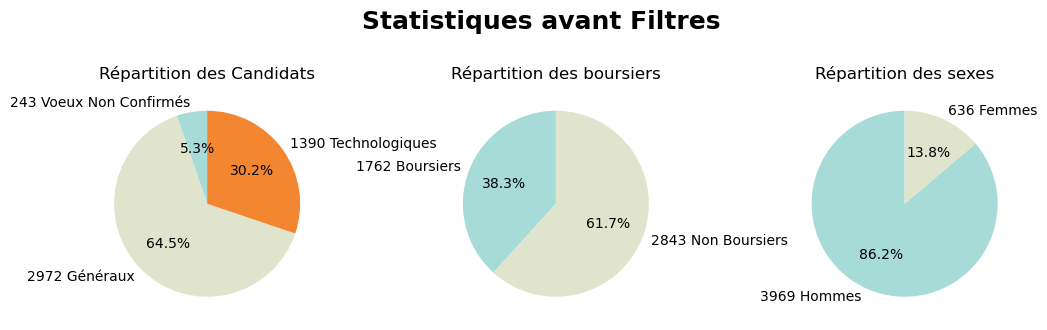

In [55]:
# données
labels1 = [str(Voeux_NonConf )+' Voeux Non Confirmés', str(Gen )+' Généraux', str(Techno )+' Technologiques']
valeurs1 = [Voeux_NonConf, Gen, Techno]

bourse = sum(df["Boursier"] != "Non boursier")
nbourse = len(df) - bourse
labels2 = [str(bourse)+' Boursiers', str(nbourse)+' Non Boursiers']
valeurs2 = [bourse, nbourse]

M = df["Sexe"].value_counts()["M"]
F = df["Sexe"].value_counts()["F"]
labels3 = [str(M)+' Hommes', str(F)+' Femmes']
valeurs3 = [M, F]

# couleurs
couleurs = ['#A7DBD8', '#E0E4CC', '#F38630']

# créer la figure et les sous-figures
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))

# dessiner le premier camembert sur la première sous-figure
ax1.pie(valeurs1, labels=labels1, colors=couleurs, autopct='%1.1f%%', startangle=90)
ax1.set_title('Répartition des Candidats')

# dessiner le deuxième camembert sur la deuxième sous-figure
ax2.pie(valeurs2, labels=labels2, colors=couleurs, autopct='%1.1f%%', startangle=90)
ax2.set_title('Répartition des boursiers')

# dessiner le troisième camembert sur la troisième sous-figure
ax3.pie(valeurs3, labels=labels3, colors=couleurs, autopct='%1.1f%%', startangle=90)
ax3.set_title('Répartition des sexes')

# ajuster les espacements entre les sous-figures
fig.subplots_adjust(wspace=0.5)

# ajout d'un titre global
fig.suptitle("Statistiques avant Filtres", fontsize=18, fontweight='bold')
# afficher la figure
plt.show()


In [81]:
FE = ELIMINATION["SEXE"].value_counts()["F"]
labels1 = [str(FE)+' éliminé', str(F)+' Classé']
valeurs1 = [FE, F]
ax1.pie(valeurs1, labels=labels1, colors=couleurs, autopct='%1.1f%%', startangle=90)
ax1.set_title('Répartition des Candidats')

AttributeError: 'numpy.ndarray' object has no attribute 'pie'

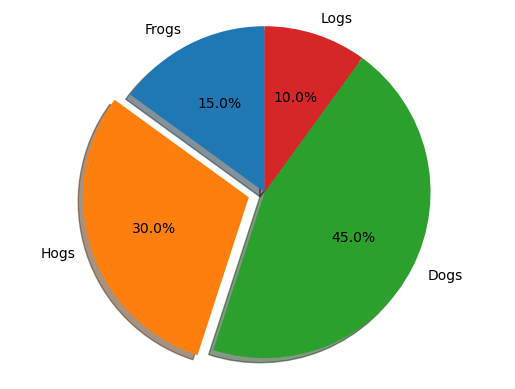